In [1]:
import numpy as np

csvname='data_sample.csv'
data=np.loadtxt(csvname,delimiter=',')

In [45]:
time_stamp=data[:,0]
v1=data[:,1]
v2=data[:,2]
v3=data[:,3]
v4=data[:,4]
v1_offset=np.average(v1[:2000])
v2_offset=np.average(v2[:2000])
v3_offset=np.average(v3[:2000])
v4_offset=np.average(v4[:2000])
v1=v1-v1_offset
v2=v2-v2_offset
v3=v3-v3_offset
v4=v4-v4_offset

In [53]:
vol=[v1,v2,v3,v4]
for i in range(len(vol)):
    for j in range(len(vol[i])):
        if abs(vol[i][j])<300:
            vol[i][j]=0
v1=vol[0]
v2=vol[1]
v3=vol[2]
v4=vol[3]

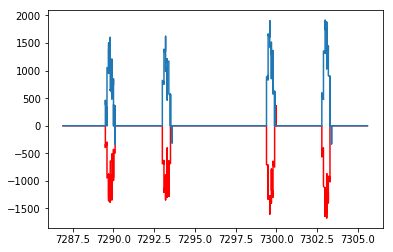

In [58]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(time_stamp[:28000],v1[:28000],'r')
plt.plot(time_stamp[:28000],v3[:28000])
plt.show()

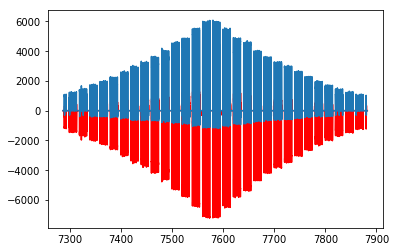

In [55]:
plt.figure()
plt.plot(time_stamp,v2,'r')
plt.plot(time_stamp,v4)
plt.show()

In [77]:
from math import sqrt
max_bend=0
min_bend = 11373
    
for i in range(len(time_stamp)):
    magnitude=sqrt(v3[i]**2+v4[i]**2)
    if magnitude > max_bend:
        max_bend = magnitude
    if magnitude != 0 and magnitude < min_bend:
        min_bend=magnitude
        
        
print(max_bend,min_bend)
    

113.73752658643255 3.0000150000000003


In [76]:
v3=v3/100
v4=v4/100
for i in range(len(time_stamp)):
    row=""
    row+=str(v3[i])
    row+=','
    row+=str(v4[i])
    row+='\n'

    with open('filtered_data','a') as f:
        f.write(row)
